In [1]:
%pylab inline
from scipy import optimize
rc('font',**{'family':'sans-serif','sans-serif':['Latin Modern']})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
datafile="g-10.00_h20.00/lapse_5.53e-01.dat" # this one has omega = 7.044948446677619103e-01

### OJO #################################################
#omegaB=0.82666    #DONT FORGET CHANGING THE VALUE OF OMEGA, g AND h HERE

omegaB=7.044948446677619103e-01
g=-10.0
h=20.0
#########################################################

import numpy.polynomial.chebyshev as pch

N=18; M=int(N/2); N0=N
r_m1=0.1; r_m2=2.5; r_m2m=5.0; r_m3=25.0

G=np.loadtxt(datafile); M0=int(N0/2)
u10=np.zeros(N0+1); v10=np.zeros(N0+1); w10=np.zeros(N0+1); z10=np.zeros(N0+1)
i1,i2=0,M0+1
for ii in np.arange(M0+1):
    u10[2*ii]=G[ii+i1]
i1,i2=i2,i2+N0+1; u20=G[i1:i2]; i1,i2=i2,i2+N0+1; u20m=G[i1:i2]; i1,i2=i2,i2+N0+1; u30=G[i1:i2]; i1,i2=i2,i2+N0+1; u40=G[i1:i2]
i1,i2=i2,i2+M0+1
for ii in np.arange(M0+1):
    v10[2*ii]=G[ii+i1]
i1,i2=i2,i2+N0+1; v20=G[i1:i2]; i1,i2=i2,i2+N0+1; v20m=G[i1:i2]; i1,i2=i2,i2+N0+1; v30=G[i1:i2]; i1,i2=i2,i2+N0+1; v40=G[i1:i2]
i1,i2=i2,i2+M0+1
for ii in np.arange(M0+1):
    w10[2*ii]=G[ii+i1]
i1,i2=i2,i2+N0+1; w20=G[i1:i2]; i1,i2=i2,i2+N0+1; w20m=G[i1:i2]; i1,i2=i2,i2+N0+1; w30=G[i1:i2]; i1,i2=i2,i2+N0+1; w40=G[i1:i2]

In [3]:
if omegaB!= G[-1]:
    print("STOP!!!! ! ! !")

In [4]:
def phi_interpol(ri):
    if ri<r_m1:
        x=ri/r_m1
        val=pch.Chebyshev(u10)(x)
    elif ri>=r_m1 and ri<r_m2:
        x=(2*ri-r_m2-r_m1)/(r_m2-r_m1)
        val=pch.Chebyshev(u20)(x)
    elif ri>=r_m2 and ri<r_m2m:
        x=(2*ri-r_m2m-r_m2)/(r_m2m-r_m2)
        val=pch.Chebyshev(u20m)(x)
    elif ri>=r_m2m and ri<r_m3:
        x=(2*ri-r_m3-r_m2m)/(r_m3-r_m2m)
        val=pch.Chebyshev(u30)(x)
    else:
        x=1.0-2.0*r_m3/ri
        val=pch.Chebyshev(u40)(x)
    return val
def N_interpol(ri):
    if ri<r_m1:
        x=ri/r_m1
        val=pch.Chebyshev(v10)(x)
    elif ri>=r_m1 and ri<r_m2:
        x=(2*ri-r_m2-r_m1)/(r_m2-r_m1)
        val=pch.Chebyshev(v20)(x)
    elif ri>=r_m2 and ri<r_m2m:
        x=(2*ri-r_m2m-r_m2)/(r_m2m-r_m2)
        val=pch.Chebyshev(v20m)(x)
    elif ri>=r_m2m and ri<r_m3:
        x=(2*ri-r_m3-r_m2m)/(r_m3-r_m2m)
        val=pch.Chebyshev(v30)(x)
    else:
        x=1.0-2.0*r_m3/ri
        val=pch.Chebyshev(v40)(x)
    return val
def Psi_interpol(ri):
    if ri<r_m1:
        x=ri/r_m1
        val=pch.Chebyshev(w10)(x)
    elif ri>=r_m1 and ri<r_m2:
        x=(2*ri-r_m2-r_m1)/(r_m2-r_m1)
        val=pch.Chebyshev(w20)(x)
    elif ri>=r_m2 and ri<r_m2m:
        x=(2*ri-r_m2m-r_m2)/(r_m2m-r_m2)
        val=pch.Chebyshev(w20m)(x)
    elif ri>=r_m2m and ri<r_m3:
        x=(2*ri-r_m3-r_m2m)/(r_m3-r_m2m)
        val=pch.Chebyshev(w30)(x)
    else:
        x=1.0-2.0*r_m3/ri
        val=pch.Chebyshev(w40)(x)
    return val

def dN_interpol(ri):
    if ri<r_m1:
        x=ri/r_m1
        val=pch.Chebyshev.deriv(pch.Chebyshev(v10),m=1)(x)/r_m1
    elif ri>=r_m1 and ri<r_m2:
        x=(2*ri-r_m2-r_m1)/(r_m2-r_m1)
        val=pch.Chebyshev.deriv(pch.Chebyshev(v20),m=1)(x)/(0.5*(r_m2-r_m1))
    elif ri>=r_m2 and ri<r_m2m:
        x=(2*ri-r_m2m-r_m2)/(r_m2m-r_m2)
        val=pch.Chebyshev.deriv(pch.Chebyshev(v20m),m=1)(x)/(0.5*(r_m2m-r_m2))
    elif ri>=r_m2m and ri<r_m3:
        x=(2*ri-r_m3-r_m2m)/(r_m3-r_m2m)
        val=pch.Chebyshev.deriv(pch.Chebyshev(v30),m=1)(x)/(0.5*(r_m3-r_m2m))
    else:
        x=1.0-2.0*r_m3/ri
        val=pch.Chebyshev.deriv(pch.Chebyshev(v40),m=1)(x)*(2.0*r_m3)/(2*r_m3/(1-x))**2
    return val
def dPsi_interpol(ri):
    if ri<r_m1:
        x=ri/r_m1
        val=pch.Chebyshev.deriv(pch.Chebyshev(w10),m=1)(x)/r_m1
    elif ri>=r_m1 and ri<r_m2:
        x=(2*ri-r_m2-r_m1)/(r_m2-r_m1)
        val=pch.Chebyshev.deriv(pch.Chebyshev(w20),m=1)(x)/(0.5*(r_m2-r_m1))
    elif ri>=r_m2 and ri<r_m2m:
        x=(2*ri-r_m2m-r_m2)/(r_m2m-r_m2)
        val=pch.Chebyshev.deriv(pch.Chebyshev(w20m),m=1)(x)/(0.5*(r_m2m-r_m2))
    elif ri>=r_m2m and ri<r_m3:
        x=(2*ri-r_m3-r_m2m)/(r_m3-r_m2m)
        val=pch.Chebyshev.deriv(pch.Chebyshev(w30),m=1)(x)/(0.5*(r_m3-r_m2m))
    else:
        x=1.0-2.0*r_m3/ri
        val=pch.Chebyshev.deriv(pch.Chebyshev(w40),m=1)(x)*(2.0*r_m3)/(2*r_m3/(1-x))**2
    return val

In [5]:
xf=480/2
num=4*2400+1

xx=np.linspace(0,xf,num)
xx_double=np.linspace(0,xf,2*(num)-1)

phi_array=zeros(2*(num)-1)
for oo in arange(2*(num)-1):
    phi_array[oo]=phi_interpol(xx_double[oo])
metric_term_array=zeros(2*(num)-1)
for oo in arange(2*(num)-1):
    metric_term_array[oo]=dN_interpol(xx_double[oo])/N_interpol(xx_double[oo])+2.0*dPsi_interpol(xx_double[oo])/Psi_interpol(xx_double[oo]) 
metric_term2_array=zeros(2*(num)-1)
for oo in arange(2*(num)-1):
    metric_term2_array[oo]=Psi_interpol(xx_double[oo])**4  
metric_term3_array=zeros(2*(num)-1)
for oo in arange(2*(num)-1):
    metric_term3_array[oo]=N_interpol(xx_double[oo])**2  

(0.0, 15.0)

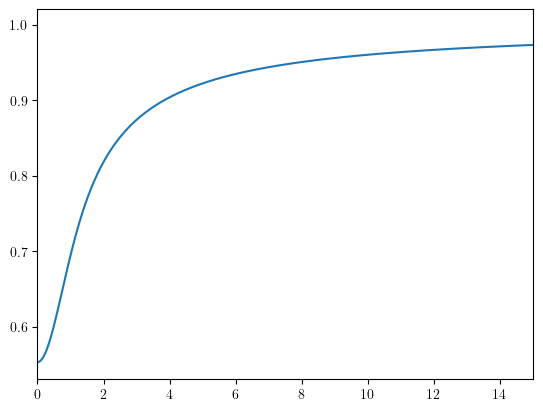

In [16]:
plot(xx_double,sqrt(metric_term3_array))
xlim(0,15)

In [7]:
metric_term2_array

array([2.04499027, 2.04492344, 2.04472301, ..., 1.00336196, 1.00336179,
       1.00336161])

In [8]:
def f(yy,t):
    Rp,Ip,dRp,dIp,Rm,Im,dRm,dIm=yy
    
    RKelement=round((t-xx_double[0])/(xx_double[-1]-xx_double[0]) * (len(xx_double)-1))
    phi=phi_array[RKelement]
    U=1.0+2.*g*phi**2+3.*h*phi**4
    W=g*phi**2+2*h*phi**4
    metric_term=metric_term_array[RKelement]
    metric_term2=metric_term2_array[RKelement]
    metric_term3=metric_term3_array[RKelement]
    
    dRpdt=dRp
    dIpdt=dIp
    ddRpdt = -2.0*dRp/(t+1e-10) - (metric_term)*Rp - metric_term2*((omegap**2/metric_term3-U)*Rp-W*Rm)       
    ddIpdt = -2.0*dIp/(t+1e-10) - (metric_term)*Ip - metric_term2*((omegap**2/metric_term3-U)*Ip+W*Im)       
    dRmdt=dRm
    dImdt=dIm
    ddRmdt = -2.0*dRm/(t+1e-10) - (metric_term)*Rm - metric_term2*((omegam**2/metric_term3-U)*Rm-W*Rp)       
    ddImdt = -2.0*dIm/(t+1e-10) - (metric_term)*Im - metric_term2*((omegam**2/metric_term3-U)*Im+W*Ip)       
    
    return array([dRpdt,dIpdt,ddRpdt,ddIpdt,dRmdt,dImdt,ddRmdt,ddImdt])

def RK(f,t,U0):
    N=len(f(U0,t[0]))
    U=zeros((N,len(t)))
    k1,k2,k3,k4=zeros((4,N,len(t)))
    U[:,0]=U0
    for ii in range(len(t)-1):
        Uii=U[:,ii]
        h=t[ii+1]-t[ii]
        k1[:,ii]=h*f(Uii,t[ii])
        k2[:,ii]=h*f(Uii+0.5*k1[:,ii],t[ii]+0.5*h)
        k3[:,ii]=h*f(Uii+0.5*k2[:,ii],t[ii]+0.5*h)
        k4[:,ii]=h*f(Uii+k3[:,ii],t[ii]+h)
        U[:,ii+1]=Uii+k1[:,ii]/6.+k2[:,ii]/3.+k3[:,ii]/3.+k4[:,ii]/6.
    return U

In [9]:
def integrate_THETA(Rm00,Im00):
    Rm0=Rm00
    Im0=Im00
    U0=Rp0,Ip0,dRp0,dIp0,Rm0,Im0,dRm0,dIm0

    SOL=RK(f,xx,U0)

    Rp_sol=SOL[0]
    Ip_sol=SOL[1]
    Rm_sol=SOL[4]
    Im_sol=SOL[5]
    dRp_sol=SOL[2]
    dIp_sol=SOL[3]
    dRm_sol=SOL[6]
    dIm_sol=SOL[7]

    kp=sqrt(omegap**2-1.)
    km=sqrt(omegam**2-1.)

    chip=Rp_sol+1j*Ip_sol
    dchip=dRp_sol+1j*dIp_sol
    chim=Rm_sol+1j*Im_sol
    dchim=dRm_sol+1j*dIm_sol

    Ap1=0.5*xx[-1]*exp(-1j*kp*xx[-1])*(kp*chip[-1]-1j*dchip[-1])
    Am1=0.5*xx[-1]*exp(-1j*km*xx[-1])*(km*chim[-1]-1j*dchim[-1])
    Bp1=0.5*xx[-1]*exp(1j*kp*xx[-1])*(kp*chip[-1]+1j*dchip[-1])
    Bm1=0.5*xx[-1]*exp(1j*km*xx[-1])*(km*chim[-1]+1j*dchim[-1])
    
    second_point = -100   #this will take also this point and take the average -10 and the trivial -1 also work
    Ap2=0.5*xx[second_point]*exp(-1j*kp*xx[second_point])*(kp*chip[second_point]-1j*dchip[second_point])
    Am2=0.5*xx[second_point]*exp(-1j*km*xx[second_point])*(km*chim[second_point]-1j*dchim[second_point])
    Bp2=0.5*xx[second_point]*exp(1j*kp*xx[second_point])*(kp*chip[second_point]+1j*dchip[second_point])
    Bm2=0.5*xx[second_point]*exp(1j*km*xx[second_point])*(km*chim[second_point]+1j*dchim[second_point])
    
    #Ap2=0.5*xx[-1]*exp(-1j*kp*xx[-1])*(kp*chip[-1]-1j*dchip[-1])
    #Am2=0.5*xx[-1]*exp(-1j*km*xx[-1])*(km*chim[-1]-1j*dchim[-1])
    #Bp2=0.5*xx[-1]*exp(1j*kp*xx[-1])*(kp*chip[-1]+1j*dchip[-1])
    #Bm2=0.5*xx[-1]*exp(1j*km*xx[-1])*(km*chim[-1]+1j*dchim[-1])
    
    Ap=(Ap1+Ap2)/2.     #here we take the average
    Am=(Am1+Am2)/2.
    Bp=(Bp1+Bp2)/2.
    Bm=(Bm1+Bm2)/2.

    #SANITY CHECK  (check that every solution satisfy eq. 44 of BS superradiance manuscript)

    check1=abs(Ap)**2/kp+abs(Bm)**2/km
    check2=abs(Am)**2/km+abs(Bp)**2/kp

    if (check1-check2)/(check1+check2)>1e-3:
        print("there was a problem "+str((check1-check2)/(check1+check2)))
    return array([Ap,Am,Bp,Bm])


def one_mode(xxxx):
    Ap,Am,Bp,Bm = integrate_THETA(xxxx[0],xxxx[1])
    if omega>0:
        return array([Am.real,Am.imag])
    if omega<0:
        return array([Bm.real,Bm.imag])

In [10]:
### NOT CHANGE
Rp0=1.0    #
Ip0=0.0    #
dRp0=0.0   #
dIp0=0.0   #
dRm0=0.0   #
dIm0=0.0   #
###########

OMEGAm=concatenate((geomspace(-5,-omegaB-1.1,20), geomspace(-omegaB-1.1,-omegaB-1.01,20)))
OMEGAp=concatenate((geomspace(5,omegaB+1.1,20), geomspace(omegaB+1.1,omegaB+1.01,20)))
OMEGA=concatenate((OMEGAm,OMEGAp))
AE=zeros(len(OMEGA))
AE_Cardoso=zeros(len(OMEGA))

semilla = array([0.04623308, -0.01241643])


for cc in arange(len(OMEGA)):
    omega=OMEGA[cc]
    omegap=omegaB+omega
    omegam=omegaB-omega

    
    root_ = optimize.root(one_mode, x0=semilla)
    
    Ap,Am,Bp,Bm = integrate_THETA(root_.x[0],root_.x[1])
    
    kp=sqrt(omegap**2-1.) # require to be recalculated here, sorry
    km=sqrt(omegam**2-1.)
    
    temp1=(omegap**2/kp**2)*abs(Ap)**2+(omegam**2/km**2)*abs(Bm)**2
    temp2=(omegap**2/kp**2)*abs(Bp)**2+(omegam**2/km**2)*abs(Am)**2

    AE[cc]=(temp1/temp2)**(sign(omega))

    temp1=(omegap/kp)*abs(Ap)**2-(omegam/km)*abs(Bm)**2
    temp2=(omegap/kp)*abs(Bp)**2-(omegam/km)*abs(Am)**2

    AE_Cardoso[cc]=abs(temp1/temp2)**(sign(omega))

    print(cc , end='')
    semilla = root_.x
    print(semilla)
    #if sign(OMEGA[cc])!=sign(OMEGA[cc+1]):
    #    semilla = array([0.04623308, -0.01241643])


0[ 0.0478368  -0.06608159]
1[ 0.05057904 -0.07013735]
2[ 0.05357091 -0.0751408 ]
3[ 0.05713006 -0.07974438]
4[ 0.06024529 -0.08509872]
5[ 0.06404532 -0.09098932]
6[ 0.06809022 -0.09716148]
7[ 0.07250435 -0.10420999]
8[ 0.07634266 -0.11185212]
9[ 0.08188575 -0.12017299]
10[ 0.0870658  -0.12922834]
11[ 0.09232201 -0.13904743]
12[ 0.09867978 -0.15037507]
13[ 0.10550573 -0.16315489]
14[ 0.11210739 -0.17743673]
15[ 0.11986433 -0.19413188]
16[ 0.1259468  -0.21429612]
17[ 0.13322899 -0.23608931]
18[ 0.13774995 -0.26308278]
19[ 0.14290943 -0.29252454]
20[ 0.14290943 -0.29252454]
21[ 0.141711   -0.29556817]
22[ 0.14211921 -0.29526783]
23[ 0.14295111 -0.29865276]
24[ 0.1414312  -0.29919996]
25[ 0.14340059 -0.30085914]
26[ 0.14185439 -0.30353221]
27[ 0.14264777 -0.30344511]
28[ 0.14304536 -0.30695275]
29[ 0.14173277 -0.30730936]
30[ 0.14358805 -0.30929076]
31[ 0.1419291  -0.31178787]
32[ 0.1428085 -0.3118653]
33[ 0.14303969 -0.31538416]
34[ 0.14176234 -0.31578238]
35[ 0.14351404 -0.31780406]
36[ 

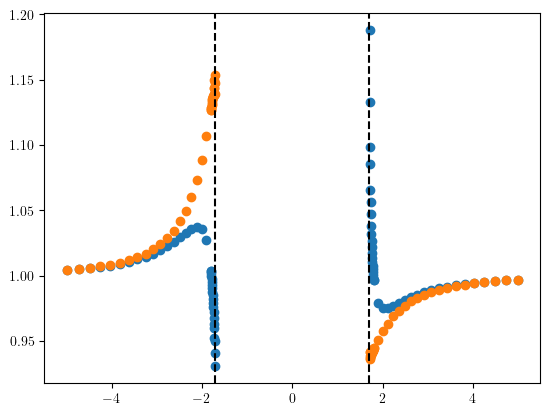

In [11]:
scatter(OMEGA,AE)
scatter(OMEGA,AE_Cardoso)
axvline(x=-omegaB-1, color="k", linestyle = "--")
axvline(x=omegaB+1, color="k", linestyle = "--")
#ylim(0,2.0)

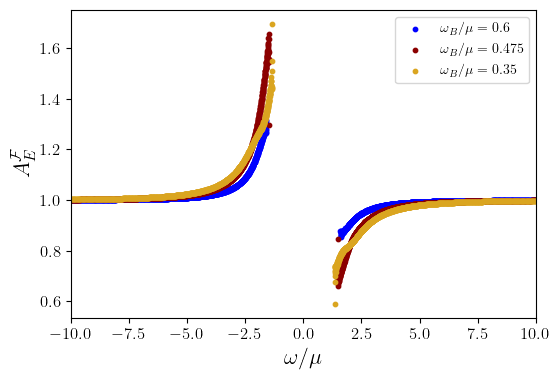

In [46]:
scatter(OMEGA1,AE_Cardoso1, color="blue", linestyle="-", label=r"$\omega_B/\mu=0.6$", s=10)
scatter(OMEGA2,AE_Cardoso2, color="darkred", linestyle="-", label=r"$\omega_B/\mu=0.475$", s=10)
scatter(OMEGA3,AE_Cardoso3, color="goldenrod", linestyle="-", label=r"$\omega_B/\mu=0.35$", s=10)
#plot(omegaNu10,MNu10/Mp**2, color="red", linestyle="-",label=r"$h=10$")

#scatter(omega_0[argmax(M_0)],M_0[argmax(M_0)], color="k", marker="s", s=10)

rcParams["figure.figsize"] = (6,4)
plt.xlabel(r"$\omega/\mu$", fontsize=16)
plt.ylabel(r"$A^\mathcal{F}_E$", fontsize=16)

#plt.legend(loc="center left", fontsize=14)

xlim(-10,10)
#ylim(0.9,1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc="best", fontsize=10)

#plt.savefig('AFlinear_gm10_h10.pdf',bbox_inches='tight')